# Import libraries and dataset

In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import os
import seaborn as sns 

from wordcloud import WordCloud
import re
import nltk 
from nltk.corpus import stopwords
from nltk.stem.porter import *
from tqdm import tqdm
#nltk.download('stopwords')

from IPython.display import display, HTML

In [2]:
os.getcwd()

'/Users/anouaroussalah/Desktop/3A/SM10/Deep Learning/bitcoin-prediction-using-twitter/notebooks'

In [2]:
df = pd.read_csv("/Users/anouaroussalah/Desktop/3A/SM10/Deep Learning/bitcoin_tweets.csv", 
                 #nrows=100000
                )

/var/folders/v2/_1kj2jc57736h6nlnncs10080000gn/T/ipykernel_3640/1453725613.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/anouaroussalah/Desktop/3A/SM10/Deep Learning/bitcoin_tweets.csv",


# Cleaning of dataset 

In [3]:
# Remove retweeted 
df = df[df.is_retweet==False]

In [4]:
relevant_features = ["user_name", "user_created", "user_followers", "user_friends", "user_favourites", "user_verified", "date", "hashtags", "text"]

In [5]:
df_1 = df[relevant_features]
df_1.head(3)

,user_name,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,text
0,DeSota Wilson,2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,['bitcoin'],Blue Ridge Bank shares halted by NYSE after #b...
1,CryptoND,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"['Thursday', 'Btc', 'wallet', 'security']","😎 Today, that's this #Thursday, we will do a ""..."
2,Tdlmatias,2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,NaN,"Guys evening, I have read this article about B..."


In [6]:
def clean_text(s):
    s = re.sub(r'http\S+', '', s)
    s = re.sub('(RT|via)((?:\\b\\W*@\\w+)+)', ' ', s)
    s = re.sub(r'#', '', s)
    s = re.sub(r'\n', ' ', s)
    s = re.sub(r'\t', ' ', s)
    s = re.sub(r'@\S+', '', s)
    s = re.sub('&amp', ' ', s)
    return s

df_1['clean_tweet'] = df_1['text'].apply(clean_text)

/var/folders/v2/_1kj2jc57736h6nlnncs10080000gn/T/ipykernel_3640/977823842.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['clean_tweet'] = df_1['text'].apply(clean_text)


In [7]:
df_1.head(5)

,user_name,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,text,clean_tweet
0,DeSota Wilson,2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,['bitcoin'],Blue Ridge Bank shares halted by NYSE after #b...,Blue Ridge Bank shares halted by NYSE after bi...
1,CryptoND,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"['Thursday', 'Btc', 'wallet', 'security']","😎 Today, that's this #Thursday, we will do a ""...","😎 Today, that's this Thursday, we will do a ""🎬..."
2,Tdlmatias,2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,NaN,"Guys evening, I have read this article about B...","Guys evening, I have read this article about B..."
3,Crypto is the future,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,"['Bitcoin', 'FX', 'BTC', 'crypto']",$BTC A big chance in a billion! Price: \487264...,$BTC A big chance in a billion! Price: \487264...
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,['BTC'],This network is secured by 9 508 nodes as of t...,This network is secured by 9 508 nodes as of t...


In [8]:
## Standardize to lower case 
def lower_case(text):
    text = text.lower()
    return text

In [9]:
df_1["clean_tweet"] = df_1["clean_tweet"].apply(lower_case)

/var/folders/v2/_1kj2jc57736h6nlnncs10080000gn/T/ipykernel_3640/2393350958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["clean_tweet"] = df_1["clean_tweet"].apply(lower_case)


In [10]:
df_1.head(3)

,user_name,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,text,clean_tweet
0,DeSota Wilson,2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,['bitcoin'],Blue Ridge Bank shares halted by NYSE after #b...,blue ridge bank shares halted by nyse after bi...
1,CryptoND,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"['Thursday', 'Btc', 'wallet', 'security']","😎 Today, that's this #Thursday, we will do a ""...","😎 today, that's this thursday, we will do a ""🎬..."
2,Tdlmatias,2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,NaN,"Guys evening, I have read this article about B...","guys evening, i have read this article about b..."


In [11]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4584416 entries, 0 to 57411156
Data columns (total 10 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   user_name        object
 1   user_created     object
 2   user_followers   object
 3   user_friends     object
 4   user_favourites  object
 5   user_verified    object
 6   date             object
 7   hashtags         object
 8   text             object
 9   clean_tweet      object
dtypes: object(10)
memory usage: 384.7+ MB


In [12]:
# Remove emoji 
df_1["clean_text"] = df_1["clean_tweet"].astype(str).apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))

/var/folders/v2/_1kj2jc57736h6nlnncs10080000gn/T/ipykernel_3640/1469608167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["clean_text"] = df_1["clean_tweet"].astype(str).apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))


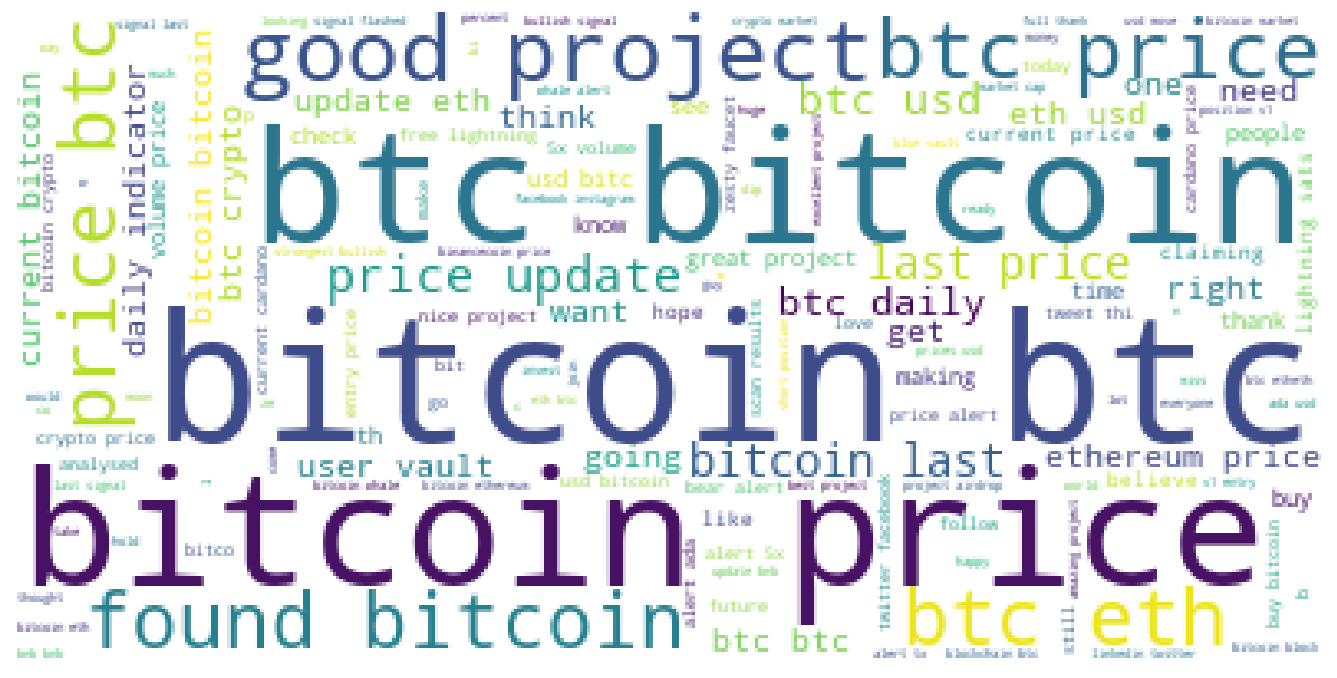

<Figure size 640x480 with 0 Axes>

In [25]:
text = df_1["clean_text"].to_string()
wordcloud = WordCloud(relative_scaling=0.5 , background_color='white',stopwords=set(stopwords.words('english'))).generate(text)
plt.figure(figsize=(17,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.savefig("/Users/anouaroussalah/Desktop/3A/SM10/Deep Learning/bitcoin-prediction-using-twitter/documents/wordcloud_tweets_to_label")

In [14]:
def keep_date_rows(df, columns):
    """
    Keep rows with date format
    """
    for col in columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')
        df = df.dropna(subset=[col])
    return df 

In [15]:
df_2 = keep_date_rows(df_1, ["user_created", "date"])

/var/folders/v2/_1kj2jc57736h6nlnncs10080000gn/T/ipykernel_3640/4291540081.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_datetime(df[col], errors='coerce')


In [16]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4584416 entries, 0 to 57411156
Data columns (total 11 columns):
 #   Column           Dtype         
---  ------           -----         
 0   user_name        object        
 1   user_created     datetime64[ns]
 2   user_followers   object        
 3   user_friends     object        
 4   user_favourites  object        
 5   user_verified    object        
 6   date             datetime64[ns]
 7   hashtags         object        
 8   text             object        
 9   clean_tweet      object        
 10  clean_text       object        
dtypes: datetime64[ns](2), object(9)
memory usage: 419.7+ MB


In [17]:
def keep_numeric_rows(df, columns):
    """
    Keep rows with date format
    """
    for col in columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df = df.dropna(subset=[col])
    return df 

In [18]:
df_3 = keep_numeric_rows(df_2, ["user_followers", "user_friends", "user_favourites"])

In [19]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4584416 entries, 0 to 57411156
Data columns (total 11 columns):
 #   Column           Dtype         
---  ------           -----         
 0   user_name        object        
 1   user_created     datetime64[ns]
 2   user_followers   float64       
 3   user_friends     float64       
 4   user_favourites  float64       
 5   user_verified    object        
 6   date             datetime64[ns]
 7   hashtags         object        
 8   text             object        
 9   clean_tweet      object        
 10  clean_text       object        
dtypes: datetime64[ns](2), float64(3), object(6)
memory usage: 419.7+ MB


In [20]:
df_3.user_verified.value_counts()

False    3384479
False    1167783
True       24670
True        7484
Name: user_verified, dtype: int64

In [21]:
final_features = ["user_name", "user_created","user_followers", "user_friends", "user_favourites", "user_verified", "clean_text"]
final_df = df_3[final_features]

In [22]:
final_df.head(3)

,user_name,user_created,user_followers,user_friends,user_favourites,user_verified,clean_text
0,DeSota Wilson,2009-04-26 20:05:09,8534.0,7605.0,4838.0,False,blue ridge bank shares halted by nyse after bi...
1,CryptoND,2019-10-17 20:12:10,6769.0,1532.0,25483.0,False,"today, that's this thursday, we will do a "" t..."
2,Tdlmatias,2014-11-10 10:50:37,128.0,332.0,924.0,False,"guys evening, i have read this article about b..."


In [23]:
final_df.to_csv('/Users/anouaroussalah/Desktop/3A/SM10/Deep Learning/Project/tweets_processed.csv', index=False)

In [24]:
len(final_df)

4584416